# Testing different pipeline elements
This notebook contains different miscellaneous tests to ensure that the behavior of our pipeline elements is correct.

In [3]:
import json
from torch.utils.data import DataLoader
import os
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append('/Users/emiliolr/Desktop/counting-cranes')
sys.path

from bird_dataset import *
from utils import *

In [4]:
config = json.load(open('/Users/emiliolr/Desktop/counting-cranes/config.json', 'r'))
DATA_FP = config['data_filepath']
SEED = config['random_seed']

## Testing utility functions (`utils.py`)

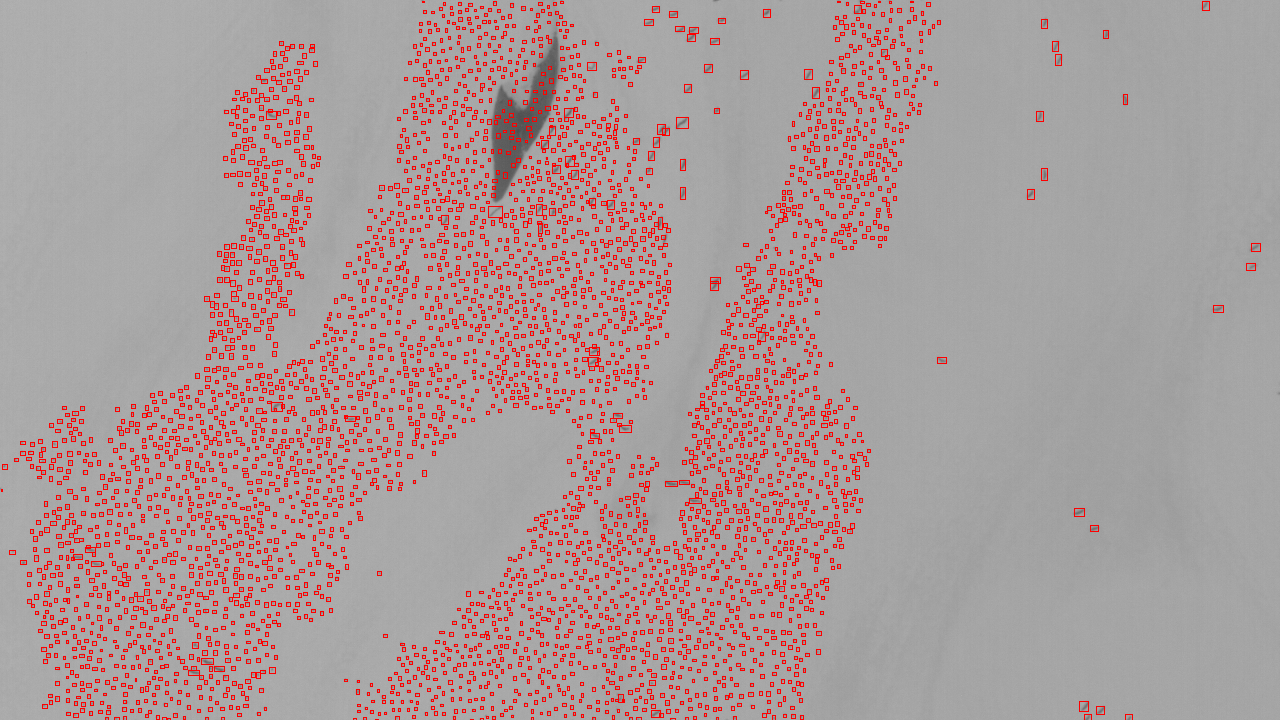

In [5]:
#Checking that bbox extraction and visualization work correctly
img_fp = os.path.join(DATA_FP, 'images/FLIR2_20210321_201851_358_2510.TIF')
annot_fp = os.path.join(DATA_FP, 'annotations/FLIR2_20210321_201851_358_2510.xml')

visualize_bboxes(img_fp, annot_fp)

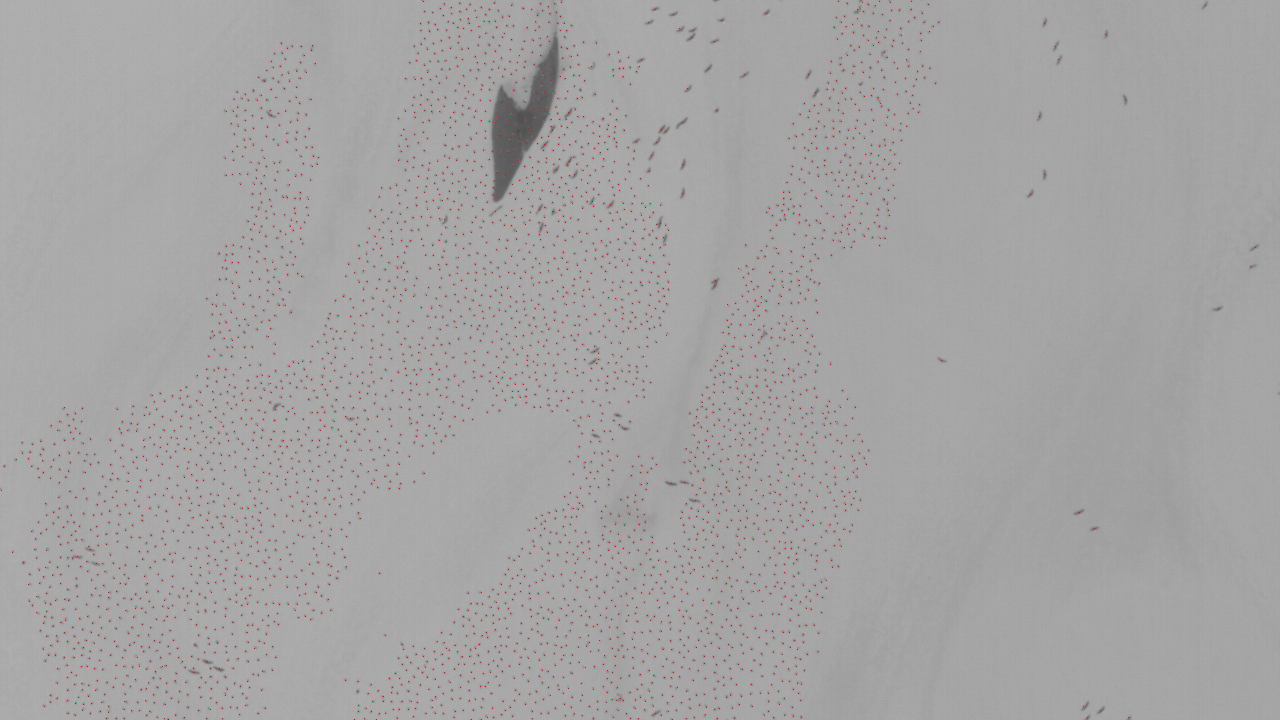

In [6]:
#Checking that point annotation translation and visualization work correctly
visualize_points(img_fp, annot_fp)

In [5]:
#Testing regression annotation type
print(f'{img_fp.split("/")[-1]} contains {get_regression(annot_fp)} birds in total')

FLIR2_20210321_201851_358_2510.TIF contains 4292 birds in total


## Testing the `BirdDataset` object
**TODO: once you have tiling stuff figured out, go through and test functionality**

In [7]:
#Checking transformations
print(get_transforms(train = True))
print()
print(get_transforms(train = False))

Compose([
], p=1.0, bbox_params=None, keypoint_params=None, additional_targets={})

Compose([
], p=1.0, bbox_params=None, keypoint_params=None, additional_targets={})


In [8]:
#Putting the dataset in a DataLoader (BEFORE tiling is implemented... behavior will change after tiling!)
bird_dataset = BirdDataset(root_dir = DATA_FP, transforms = get_transforms())
dataloader = DataLoader(bird_dataset, batch_size = 1, shuffle = True, collate_fn = collate_w_tiles)

#Pulling a batch out of the iterator
images, targets = next(iter(dataloader))
print(f'Batch size of {len(images)} with each tensor of shape {images[0].shape}')
print(f'We have a {type(targets)} of {type(targets[0])}')

Batch size of 18 with each tensor of shape torch.Size([3, 224, 244])
We have a <class 'list'> of <class 'dict'>


In [7]:
#Checking data types of dictionary elements
t = targets[0]
print(f'Bounding boxes are {t["boxes"].dtype}')
print(f'Labels are {t["labels"].dtype}')

Bounding boxes are torch.float32
Labels are torch.int64


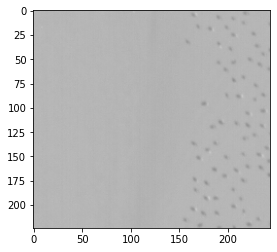

In [8]:
#Looking at images w/in the batch
index = 12
np_img = images[index].numpy()
np_img = np.moveaxis(np_img, 0, -1)
plt.imshow(np_img)

In [9]:
#Checking the target dictionaries
print(f'{len(targets[index]["boxes"])} birds in tile {index}')

77 birds in tile 12


In [13]:
#Can we make it all the way through the DataLoader, i.e., is this process working for all parent images?
for num, data in enumerate(dataloader):
    print(f'On image {num}', end = '')
    images, targets = data

On image 0 --> passed
On image 1 --> passed
On image 2 --> passed
On image 3 --> passed


ValueError: y_max is less than or equal to y_min for bbox (0.00234375, 0.001388888888888889, 0.00625, 0.001388888888888889, 1.0).